<h1>Minimax</h1>

En teoría de juegos, un árbol de juego es un grafo dirigido de tipo árbol cuyos nodos representan posiciones en el juego y cuyas aristas representan movimientos. Es posible representar una sucesión de jugadas mediante un camino conexo del árbol. 
<ul>
<li> El objetivo de los juegos de dos oponentes es realizar una serie de acciones que de manera óptima (con restricciones de tiempo y capacidad de explorar el árbol de búsqueda) lleven hacia la victoria.</li>
<li> El algoritmo de búsqueda Minimax trata de optimizar las acciones (Max) y al mismo tiempo minimizar las acciones del oponente (Min) </li>    
<li> Las acciones del oponente no son conocidas apriori y por lo tanto no es posible determinar el árbol de búsqueda, sin embargo podemos asumir que el oponente siempre va a realizar la mejor jugada que sea posible.</li>
<li> Al igual que la búsqueda en profundidad, Minimax tiene complejidad $O(b^d)$ y requerimientos de memoria $O(bd)$     </li>
</ul>

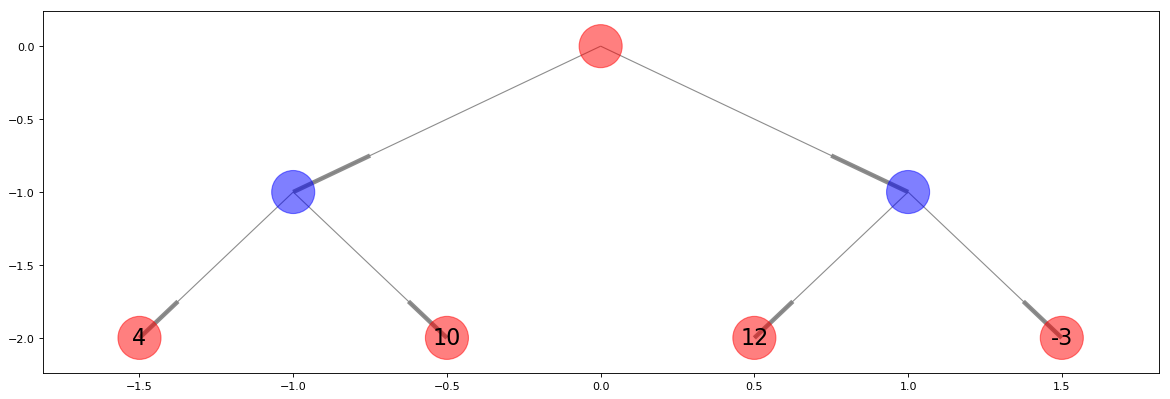

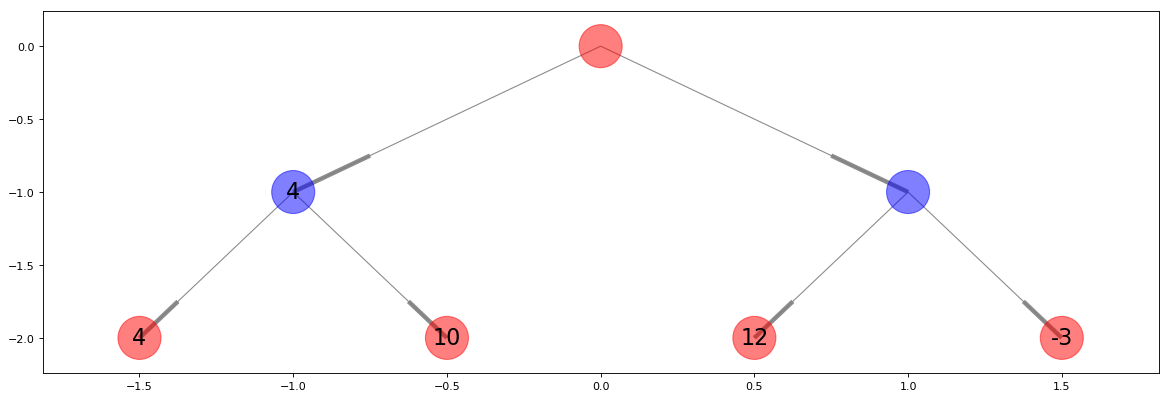

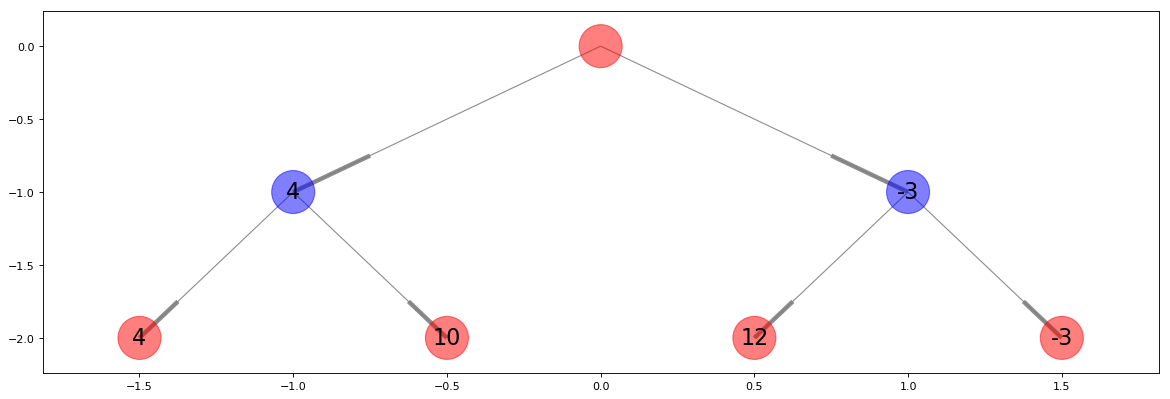

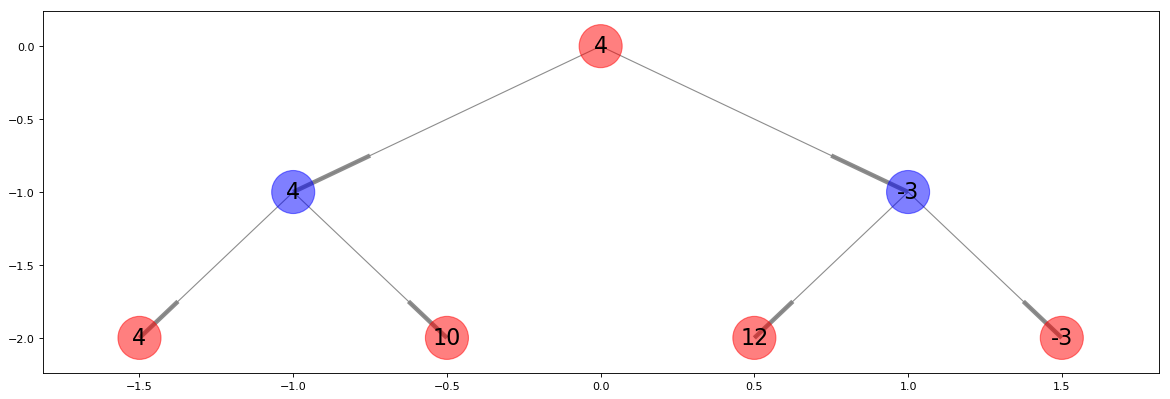

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G=nx.DiGraph()
G.add_edges_from([('a','b'),('a','c'),('b','d'),('b','f'),('c','g'),('c','h')])
pos={'a':(0,0),'b':(-1,-1),'c':(1,-1),'d':(-1.5,-2),'f':(-0.5,-2),'g':(1.5,-2),'h':(0.5,-2)}

node_color=['r','b','b','r','r','r','r']

#'a':4,'b':4,'c':-3,'d':4,'
max_labels={'d':4,'f':10,'g':-3,'h':12}
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx_edges(G,pos,edge_color='gray',width=1,alpha=0.9)
nx.draw_networkx_nodes(G,pos,node_size=1500,node_color=node_color,alpha=0.5)
nx.draw_networkx_labels(G,pos,max_labels,font_size=20,font_family='sans-serif')

min_labels=dict(max_labels,**{'b':4})
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx_edges(G,pos,edge_color='gray',width=1,alpha=0.9)
nx.draw_networkx_nodes(G,pos,node_size=1500,node_color=node_color,alpha=0.5)
nx.draw_networkx_labels(G,pos,min_labels,font_size=20,font_family='sans-serif')

min_labels=dict(min_labels,**{'c':-3})
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx_edges(G,pos,edge_color='gray',width=1,alpha=0.9)
nx.draw_networkx_nodes(G,pos,node_size=1500,node_color=node_color,alpha=0.5)
nx.draw_networkx_labels(G,pos,min_labels,font_size=20,font_family='sans-serif')
#plt.show()

max_labels=dict(min_labels,**{'a':4})
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
nx.draw_networkx_edges(G,pos,edge_color='gray',width=1,alpha=0.9)
nx.draw_networkx_nodes(G,pos,node_size=1500,node_color=node_color,alpha=0.5)
nx.draw_networkx_labels(G,pos,max_labels,font_size=20,font_family='sans-serif')
plt.show()

<h1>Gato</h1>

El tres en línea, también conocido Gato es un juego de lápiz y papel entre dos jugadores: O y X, que marcan los espacios de un tablero de 3×3 alternadamente. Un jugador gana si consigue tener una línea de tres de sus símbolos: la línea puede ser horizontal, vertical o diagonal.


In [8]:
import numpy as np


class Gato:
    
    def __init__(self):
        self.board=np.zeros((3,3))
        self.human=1
        self.ai=-1
        self.draw=-2

    def player(self,player):
        char=' '
        if (player==self.human):
            char='X'
        elif (player==self.ai):
            char='O'
        elif (player==self.draw):
            char='Empate'
        return char
    
    def check_winner(self,player,board=None):
        if board is None:
            board=self.board
        ind=player*3
        winner=False
        if (np.any(board.sum(axis=0)==ind) or np.any(board.sum(axis=1)==ind) or np.trace(board)==ind or np.trace(np.fliplr(board))==ind):
            winner=True
        return winner


    def print_board(self,board=None):
        if board is None:
            board=self.board
        #print('-----------')
        print(' ' + self.player(board[0][0]) + ' | ' + self.player(board[0][1]) + ' | ' + self.player(board[0][2]))
        #print('-----------')
        print(' ' + self.player(board[1][0]) + ' | ' + self.player(board[1][1]) + ' | ' + self.player(board[1][2]))
        #print('-----------')
        print(' ' + self.player(board[2][0]) + ' | ' + self.player(board[2][1]) + ' | ' + self.player(board[2][2]))
        #print('-----------')

    def available_moves(self,board=None):
        if board is None:
            board=self.board
        x,y=np.where(board==0)
        return zip(x,y)

    def human_move(self):	
        moves=self.available_moves()
        z=input('Ingrese jugada : ')
        while z not in moves or not isinstance(z, tuple):
            print('no disponible!')
            z=input('Ingrese jugada : ')
        self.board[z[0]][z[1]]=self.human

    def utility(self,board,fun):
        utility=0
        if(self.check_winner(self.human,board)):
            utility=-1
        elif(self.check_winner(self.ai,board)):
            utility=1
        elif(not np.any(board==0)):
            utility=0
        else: utility=fun(board)
        return utility

    def max(self,board):
        moves=self.available_moves(board)
        score=[]
        for move in moves:
            new_board=board.copy()
            new_board[move[0]][move[1]]=self.ai
            new_score=self.utility(new_board,self.min)
            score.append(new_score)
        return max(score)
    
    def min(self,board):
        moves=self.available_moves(board)
        score=[]
        for move in moves:
            new_board=board.copy()
            new_board[move[0]][move[1]]=self.human
            new_score=self.utility(new_board,self.max)
            score.append(new_score)
        return min(score)
        
    def ai_move(self):
        moves=self.available_moves()
        score=[]
        for move in moves:
            new_board=self.board.copy()
            new_board[move[0]][move[1]]=self.ai
            new_score=self.utility(new_board,self.min)
            score.append(new_score)
            self.print_board(new_board)
            print 'score : ',new_score
            print '--------------------------'    
        z=moves[np.argmax(score)]
        print 'score:',score
        self.board[z[0]][z[1]]=self.ai

    def play_game(self):
        winner=False
        self.print_board()
        player=self.ai
        #player=[self.ai,self.human][np.random.binomial(1,0.5)]
        while(True):
            if(not np.any(self.board==0)):
                player=self.draw
                break
            if(player==self.human):
                self.human_move()
                print 'Humano:'
                self.print_board()
                if(self.check_winner(self.human)):
                    break
                else:
                    player=self.ai
            elif(player==self.ai):
                print 'IA:'
                self.ai_move()
                self.print_board()
                if(self.check_winner(self.ai)):
                    break
                else:
                    player=self.human
        print 'Ganador :',self.player(player)
        return self.player(player)

In [12]:
g=Gato()
g.play_game()


   |   |  
   |   |  
   |   |  
IA:
 O |   |  
   |   |  
   |   |  
score :  0
--------------------------
   | O |  
   |   |  
   |   |  
score :  0
--------------------------
   |   | O
   |   |  
   |   |  
score :  0
--------------------------
   |   |  
 O |   |  
   |   |  
score :  0
--------------------------
   |   |  
   | O |  
   |   |  
score :  0
--------------------------
   |   |  
   |   | O
   |   |  
score :  0
--------------------------
   |   |  
   |   |  
 O |   |  
score :  0
--------------------------
   |   |  
   |   |  
   | O |  
score :  0
--------------------------
   |   |  
   |   |  
   |   | O
score :  0
--------------------------
score: [0, 0, 0, 0, 0, 0, 0, 0, 0]
 O |   |  
   |   |  
   |   |  
Ingrese jugada : (2,2)
Humano:
 O |   |  
   |   |  
   |   | X
IA:
 O | O |  
   |   |  
   |   | X
score :  -1
--------------------------
 O |   | O
   |   |  
   |   | X
score :  1
--------------------------
 O |   |  
 O |   |  
   |   | X
score :  -1


'O'

<h1>Poda alpha-beta</h1>

<ul>
<li> El problema con la búsqueda Minimax es que el número de evaluaciones del estado del juego crece exponencialmente con la profundidad del árbol.</li>
<li> Una alternativa eficiente es podar el árbol y de esa manera eliminar caminos que no tengan mayor influencia en la decisión final.</li>
<li> El valor $\alpha$ representa el mejor valor encontrado por MAX en un camino dado. Cualquier vértice $V$ menor que $\alpha$ no necesita ser evaluado. </li>
<li> El valor $\beta$ representa el mejor valor encontrado por MIN en un camino dado. </li>
<li> Cuando un nodo $V$ detecta que su evaluaci\'on ser\'a peor que $\alpha$ y $\beta$ actuales, poda el sub-árbol con los hijos de $V$. </li>
 </ul>